In [17]:
import pandas as pd
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
import emoji

In [18]:
df = pd.read_csv(r"C:\Users\jathi\Downloads\Combined Data.csv")

In [19]:
df

,Unnamed: 0,statement,status
0,0,oh my gosh,Anxiety
1,1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety
3,3,I've shifted my focus to something else but I'...,Anxiety
4,4,"I'm restless and restless, it's been a month n...",Anxiety
...,...,...,...
53038,53038,Nobody takes me seriously I’ve (24M) dealt wit...,Anxiety
53039,53039,"selfishness ""I don't feel very good, it's lik...",Anxiety
53040,53040,Is there any way to sleep better? I can't slee...,Anxiety
53041,53041,"Public speaking tips? Hi, all. I have to give ...",Anxiety


## Model Building

In [20]:
df = df.drop(["Unnamed: 0"], axis = 1)

In [21]:
df

,statement,status
0,oh my gosh,Anxiety
1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety
3,I've shifted my focus to something else but I'...,Anxiety
4,"I'm restless and restless, it's been a month n...",Anxiety
...,...,...
53038,Nobody takes me seriously I’ve (24M) dealt wit...,Anxiety
53039,"selfishness ""I don't feel very good, it's lik...",Anxiety
53040,Is there any way to sleep better? I can't slee...,Anxiety
53041,"Public speaking tips? Hi, all. I have to give ...",Anxiety


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53043 entries, 0 to 53042
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   statement  52681 non-null  object
 1   status     53043 non-null  object
dtypes: object(2)
memory usage: 828.9+ KB


In [23]:
df[df['statement'].isna()][['statement', 'status']]

,statement,status
293,NaN,Anxiety
572,NaN,Anxiety
595,NaN,Anxiety
1539,NaN,Normal
2448,NaN,Normal
...,...,...
52838,NaN,Anxiety
52870,NaN,Anxiety
52936,NaN,Anxiety
53010,NaN,Anxiety


In [24]:
df['statement'][40000]

'it s been a lot of stress past the last three year i feel like i can t take it anymore i m too anti social i can t talk to anyone i just start shaking and can t say a word and then this feeling of embarrassment will haunt me for the rest of the day no one want to talk with me i feel like i shouldn t be here like i m a burden to everyone i have to hold my emotion inside never letting them out and this is killing me i ve been cry for the last few day i feel so pathetic am i the problem i am so lost'

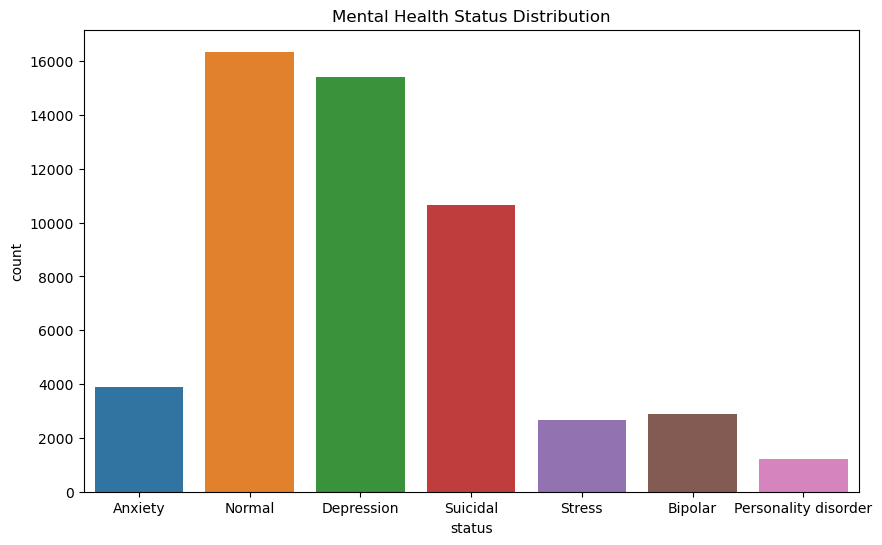

In [25]:
## mental health distribution

plt.figure(figsize= (10, 6))
plt.title('Mental Health Status Distribution')
sns.countplot(x=df['status'])
plt.show()

In [26]:
df.dropna(inplace = True)

In [27]:
df[df['statement'].isna()][['statement', 'status']]

,statement,status


In [28]:
df['statement'].str.lower()

0                                               oh my gosh
1        trouble sleeping, confused mind, restless hear...
2        all wrong, back off dear, forward doubt. stay ...
3        i've shifted my focus to something else but i'...
4        i'm restless and restless, it's been a month n...
                               ...                        
53038    nobody takes me seriously i’ve (24m) dealt wit...
53039    selfishness  "i don't feel very good, it's lik...
53040    is there any way to sleep better? i can't slee...
53041    public speaking tips? hi, all. i have to give ...
53042    i have really bad door anxiety! it's not about...
Name: statement, Length: 52681, dtype: object

In [29]:
df

,statement,status
0,oh my gosh,Anxiety
1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety
3,I've shifted my focus to something else but I'...,Anxiety
4,"I'm restless and restless, it's been a month n...",Anxiety
...,...,...
53038,Nobody takes me seriously I’ve (24M) dealt wit...,Anxiety
53039,"selfishness ""I don't feel very good, it's lik...",Anxiety
53040,Is there any way to sleep better? I can't slee...,Anxiety
53041,"Public speaking tips? Hi, all. I have to give ...",Anxiety


In [30]:
def eda(data,column):
    count = 0
    count = data[column].apply(lambda x: count + emoji.emoji_count(x)).sum()  #emoji count in the data
    upper =data[column].str.isupper().sum()
    url = data[column].apply(lambda x:   True  if re.search(r'www.\S+ | https?://\S+',x)  else False).sum()
    tags = data[column].apply(lambda x:   True  if re.search(r'<[^>]>+',x)  else False).sum()
    marks = data[column].apply(lambda x:   True  if re.search(r'[^a-zA-Z0-9 ]',x)  else False).sum()
    digits = data[column].apply(lambda x:   True  if re.search(r'[0-9]',x)  else False).sum()
    return  pd.Series({'Emoji':count,"upper case":upper,"urls" : url,"HTML tags":tags,'Punctuaton':marks,'Digits':digits})

In [31]:
df['statement'] = df['statement'].apply(lambda x : emoji.demojize(x).replace(':',''))

In [32]:
df['statement'] = df['statement'].str.lower()

In [33]:
df['statement'] = df['statement'].apply(lambda x :re.sub(r'www.\S+ | https?://\S+', ' ' ,x))

In [34]:
df['statement'] = df['statement'].apply(lambda x :re.sub(r'[^a-zA-Z0-9 ]',' ' ,x))

In [35]:
df['statement'] = df['statement'].apply(lambda x :re.sub(r'[0-9]',' ' ,x))

In [36]:
eda(df,'statement')

Emoji           0
upper case      0
urls          158
HTML tags       0
Punctuaton      0
Digits          0
dtype: int64

In [37]:
## df.to_csv('Mntl_Health.csv')

In [38]:
## import os
## os.getcwd()

# Bag of Words(Count of words)

In [39]:
from sklearn.feature_extraction.text import CountVectorizer

In [40]:
bow = CountVectorizer(stop_words='english', max_features=10000) 

In [41]:
bow.fit(df['statement'])
X = bow.transform(df['statement'])
y = df['status']

In [42]:
bow.vocabulary_

{'oh': 6000,
 'gosh': 3813,
 'trouble': 9199,
 'sleeping': 8043,
 'confused': 1766,
 'mind': 5515,
 'restless': 7371,
 'heart': 4056,
 'tune': 9228,
 'wrong': 9922,
 'dear': 2171,
 'forward': 3558,
 'doubt': 2636,
 'stay': 8377,
 'place': 6454,
 've': 9530,
 'shifted': 7869,
 'focus': 3492,
 'worried': 9882,
 'month': 5617,
 'boy': 1034,
 'mean': 5381,
 'break': 1058,
 'nervous': 5795,
 'like': 5076,
 'heck': 4076,
 'feel': 3320,
 'scared': 7623,
 'anxious': 389,
 'family': 3253,
 'protected': 6816,
 'felt': 3330,
 'didn': 2397,
 'know': 4894,
 'haven': 4024,
 'slept': 8048,
 'days': 2155,
 'huh': 4259,
 'really': 7065,
 'want': 9663,
 'night': 5830,
 'don': 2610,
 'strange': 8460,
 'feeling': 3321,
 'good': 3799,
 'lately': 4949,
 'time': 8992,
 'sleep': 8041,
 'needed': 5766,
 'problem': 6732,
 'laugh': 4953,
 'forget': 3533,
 'remember': 7245,
 'turns': 9236,
 'sad': 7555,
 'burden': 1149,
 'blah': 901,
 'worry': 9885,
 'thoughts': 8938,
 'make': 5275,
 'afraid': 199,
 'close': 1543

In [43]:
df1 = df.sample(10000)

In [44]:
df1.to_csv('mental_hlth.csv')

In [45]:
X = bow.fit_transform(df1['statement'])
y = df1['status']

In [46]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=23)

## KNN

In [47]:
from sklearn.metrics import accuracy_score

In [48]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
accuracy_score(y_test,y_pred)

0.491

## Naive Byes

In [49]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train,y_train)
y_pred = nb.predict(X_test)
accuracy_score(y_test,y_pred)

0.6485

## Decission Tree

In [50]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
accuracy_score(y_test,y_pred)

0.6355

## Support Vector Classifier

In [51]:
# from sklearn.svm import SVC
# sv = SVC()
# sv.fit(X_train,y_train)
# y_pred = sv.predict(X_test)
# accuracy_score(y_test,y_pred)

In [52]:
import pickle

In [53]:
pickle.dump(nb,open("mh.pkl","wb"))  # writing as a binary format

In [54]:
model = pickle.load(open("mh.pkl","rb"))

In [55]:
pickle.dump(bow,open("bow1.pkl","wb"))  # writing as a binary format

In [56]:
bow = pickle.load(open("bow1.pkl","rb"))

In [57]:
df1

,statement,status
28328,i m struggling to figure out what s wrong with...,Stress
22679,i got the best news of my life that i was actu...,Suicidal
14335,i just want to be put out of my misery i do n...,Suicidal
44612,jsparsons i am starting my prep for the pmp ex...,Normal
40175,now i regret ever seeking help the hotline had...,Depression
...,...,...
35557,so anxious i literally just ran out of the den...,Anxiety
32703,i d have to say babe ruth,Normal
28407,i didn t understand why he wanted to get me an...,Stress
7912,having depression and or anxieties can fck you...,Depression


In [58]:
df['statement'][46657]

'should i tell him  hi everyone      i m currently doing my honours in zoology which entails a research project  i have two supervisors one of the professors at my uni and a postdoc whose research i will be elaborating on      it s a lot of work so far  writing up  going through literature  making proposals  etc    i started this year off on a really bad foot and i ve just been in a really low place for the whole of it  i m type    so i m either down or i m really down      anyway  it s definitely affecting my productivity at this point  i m also scared that it s affecting my relationship with my supervisors because i can t get myself to talk to them when i m in my down cycle  or  if i do  i always say the wrong thing or come off as defensive       i m going to have to work with them through the whole year and i m scared this keeps going on  i don t like to tell people that i m bipolar but i wonder whether it will make things easier if i told my professor  he s an amazing guy and would

In [59]:
df['statement'][43716]

'slept badly still feel like hell but maybe not a bad a yesterday why am i always ill when i take time off work'

In [60]:
df['statement'][16693]

'i feel like i will not ever find true friends who i can trust everyone always has betrayed me in the past  i always feel like i am beign judged by my  friends  and getting gossiped by them  my mother asks me commonly why am i always home and why do not i go outside to hang out with someone but i do not have a heart to tell her about my problems  so an advice would be helpfull i feel hopeless'

In [61]:
df['statement'][44037]

'just bought a car and my impending fatherhood is affecting my judgement out with plan of a  ci and in with a rav'